## Two-step RNN

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.model_selection import KFold

### Load, understand, and preprocess data

In [2]:
# Load data
features = ['doRareTrans', 'outcomeBin', 'resp1']
target = 'wMF'

df_MB = pd.read_csv('/Users/noraxiao/Documents/twoStep_RNN/code/data/genData_smB_mfA_mbA_MB.csv', 
                    usecols=features)
df_MF = pd.read_csv('/Users/noraxiao/Documents/twoStep_RNN/code/data/genData_smB_mfA_mbA_MF.csv', 
                    usecols=features)

print('Feature names: ', features, '\n')

Feature names:  ['doRareTrans', 'outcomeBin', 'resp1'] 



In [3]:
# Preprocess data
features_to_shift = ['doRareTrans', 'outcomeBin', 'resp1'] # Account for prev vs curr trial
n_trials_per_subject = 154
n_subjects = (df_MB.shape[0] + df_MF.shape[0]) // n_trials_per_subject

# Add column indicating percentage of MB/MF
df_MB.insert(0, target, 0)
df_MF.insert(0, target, 1)

# Concatenate MB and MF datasets and shuffle by subject
df = pd.concat([df_MB, df_MF], axis=0).reset_index(drop=True)

In [4]:
# Data pipeline
def process_data(df, n_subjects, n_trials_per_subject, features_to_shift):
    """ Pre-processes data by shifting and reshaping.
    
    Args:
        df (pd.DataFrame): the dataframe to be processed
        n_trials_per_subject (int): the number of trials per subject
        features_to_shift (list): features that are offset and need to be shifted
    Returns:
        reshaped_data (np.array): shifted + reshaped data
    """
    # Shift by 1 row to account for previous vs current trial info
    for i in range(0, len(df), n_trials_per_subject):
        subject = df.loc[i:i+n_trials_per_subject, features_to_shift]  
        subject_shifted = subject.shift(periods=1, fill_value=0)
        df.loc[i:i+n_trials_per_subject, features_to_shift] = subject_shifted 

    # Apply one-hot encoding to IDs
    # df = pd.get_dummies(df, columns=['ID']).astype(int)

    # Reshape to separate subjects
    reshaped_data = df.values.reshape((n_subjects, n_trials_per_subject, -1))

    return reshaped_data

In [5]:
reshaped_data = process_data(df, n_subjects, n_trials_per_subject, features_to_shift)

# Split features and labels
x_all = reshaped_data[:, :, 1:]
y_all = reshaped_data[:, :, 0:1]
y_all = y_all[:, 0, :]

print('Input shape: ', x_all.shape)
print('Target shape: ', y_all.shape, '\n')

n_features = x_all.shape[2]
print('Number of preprocessed features: ', n_features)

Input shape:  (2000, 154, 3)
Target shape:  (2000, 1) 



### Build and fit model with cross-validation

Processing fold 1/5
Epoch 1/100


/opt/miniconda3/envs/twoStep_RNN/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - binary_accuracy: 0.5069 - binary_crossentropy: 0.7061 - loss: 0.7061 - val_binary_accuracy: 0.4975 - val_binary_crossentropy: 0.6929 - val_loss: 0.6929
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - binary_accuracy: 0.5013 - binary_crossentropy: 0.6923 - loss: 0.6923 - val_binary_accuracy: 0.4975 - val_binary_crossentropy: 0.6952 - val_loss: 0.6952
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - binary_accuracy: 0.5302 - binary_crossentropy: 0.6898 - loss: 0.6898 - val_binary_accuracy: 0.5025 - val_binary_crossentropy: 0.6955 - val_loss: 0.6955
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - binary_accuracy: 0.5117 - binary_crossentropy: 0.6917 - loss: 0.6917 - val_binary_accuracy: 0.5025 - val_binary_crossentropy: 0.6985 - val_loss: 0.6985
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - binary_accuracy: 0.4830 - binary_crossentropy: 0.6966 - loss: 0.6966 - val_binary_accuracy: 0.4900 - val_binary_crossentropy: 0.6933 -

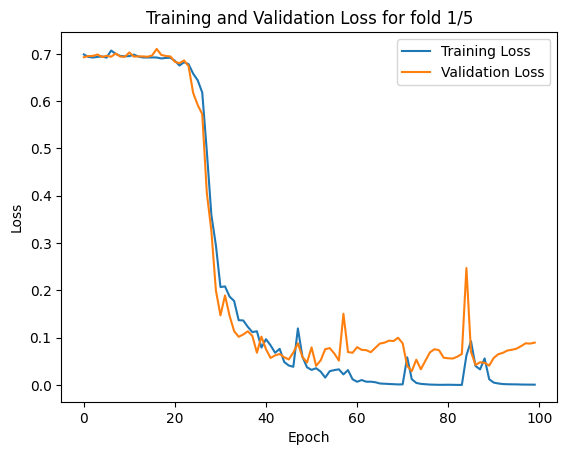

Best loss of: 0.029239526018500328 at epoch 72
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - binary_accuracy: 0.9906 - binary_crossentropy: 0.0544 - loss: 0.0544  
Processing fold 2/5
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.5120 - binary_crossentropy: 0.7124 - loss: 0.7124 - val_binary_accuracy: 0.5050 - val_binary_crossentropy: 0.6932 - val_loss: 0.6932
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - binary_accuracy: 0.5502 - binary_crossentropy: 0.6896 - loss: 0.6896 - val_binary_accuracy: 0.5075 - val_binary_crossentropy: 0.6957 - val_loss: 0.6957
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - binary_accuracy: 0.5167 - binary_crossentropy: 0.6961 - loss: 0.6961 - val_binary_accuracy: 0.5075 - val_binary_crossentropy: 0.7025 - val_loss: 0.7025
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - binary_accuracy: 0.4996 - binary_crossentropy: 0.6997 - loss: 0.6997 - val_binary_accuracy: 0.5075 - val_binary_crossentropy: 0.6933 - val_loss: 0.6

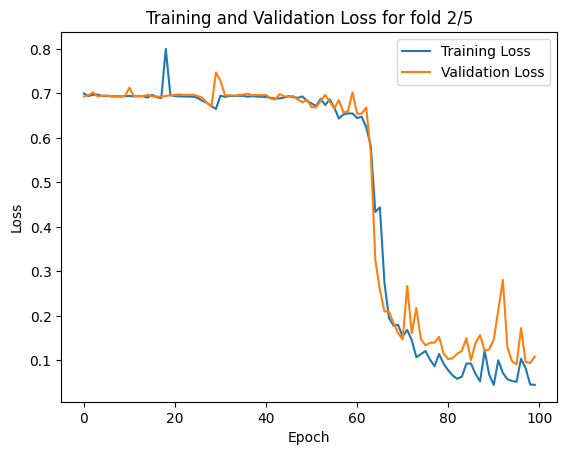

Best loss of: 0.09091390669345856 at epoch 95
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_accuracy: 0.9606 - binary_crossentropy: 0.1128 - loss: 0.1128
Processing fold 3/5
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - binary_accuracy: 0.5195 - binary_crossentropy: 0.7031 - loss: 0.7031 - val_binary_accuracy: 0.5025 - val_binary_crossentropy: 0.6923 - val_loss: 0.6923
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - binary_accuracy: 0.5216 - binary_crossentropy: 0.6924 - loss: 0.6924 - val_binary_accuracy: 0.5025 - val_binary_crossentropy: 0.6994 - val_loss: 0.6994
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - binary_accuracy: 0.4854 - binary_crossentropy: 0.6977 - loss: 0.6977 - val_binary_accuracy: 0.4950 - val_binary_crossentropy: 0.6938 - val_loss: 0.6938
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - binary_accuracy: 0.5147 - binary_crossentropy: 0.6939 - loss: 0.6939 - val_binary_accuracy: 0.5050 - val_binary_crossentropy: 0.6927 - val_loss: 0.6927

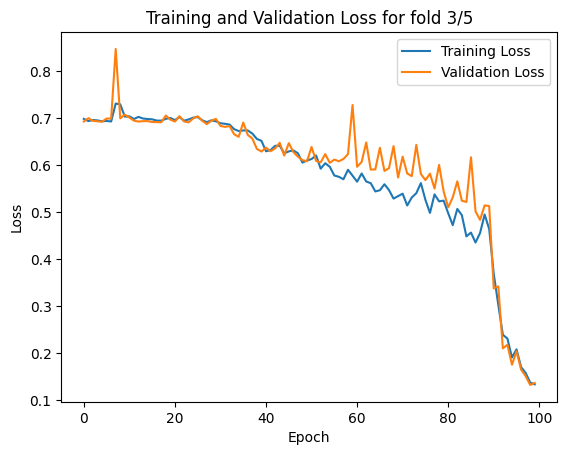

Best loss of: 0.13196872174739838 at epoch 98
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - binary_accuracy: 0.9523 - binary_crossentropy: 0.1182 - loss: 0.1182
Processing fold 4/5
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - binary_accuracy: 0.5123 - binary_crossentropy: 0.7143 - loss: 0.7143 - val_binary_accuracy: 0.4925 - val_binary_crossentropy: 0.7055 - val_loss: 0.7055
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - binary_accuracy: 0.5279 - binary_crossentropy: 0.6918 - loss: 0.6918 - val_binary_accuracy: 0.5125 - val_binary_crossentropy: 0.6960 - val_loss: 0.6960
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - binary_accuracy: 0.5057 - binary_crossentropy: 0.7015 - loss: 0.7015 - val_binary_accuracy: 0.5000 - val_binary_crossentropy: 0.6958 - val_loss: 0.6958
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - binary_accuracy: 0.4904 - binary_crossentropy: 0.7013 - loss: 0.7013 - val_binary_accuracy: 0.5075 - val_binary_crossentropy: 0.6928 - val_loss: 0.6928

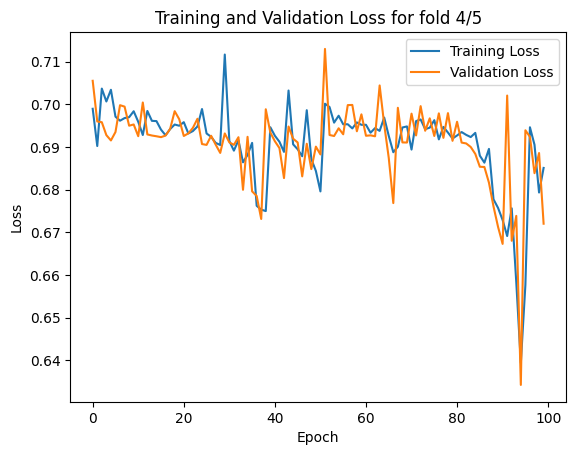

Best loss of: 0.6342551112174988 at epoch 94
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - binary_accuracy: 0.6108 - binary_crossentropy: 0.6704 - loss: 0.6704
Processing fold 5/5
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - binary_accuracy: 0.4922 - binary_crossentropy: 0.7356 - loss: 0.7356 - val_binary_accuracy: 0.5025 - val_binary_crossentropy: 0.6939 - val_loss: 0.6939
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - binary_accuracy: 0.5099 - binary_crossentropy: 0.6933 - loss: 0.6933 - val_binary_accuracy: 0.5000 - val_binary_crossentropy: 0.6949 - val_loss: 0.6949
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - binary_accuracy: 0.5150 - binary_crossentropy: 0.6921 - loss: 0.6921 - val_binary_accuracy: 0.4800 - val_binary_crossentropy: 0.7154 - val_loss: 0.7154
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - binary_accuracy: 0.5056 - binary_crossentropy: 0.6955 - loss: 0.6955 - val_binary_accuracy: 0.5500 - val_binary_crossentropy: 0.6834 - val_loss: 0.6834

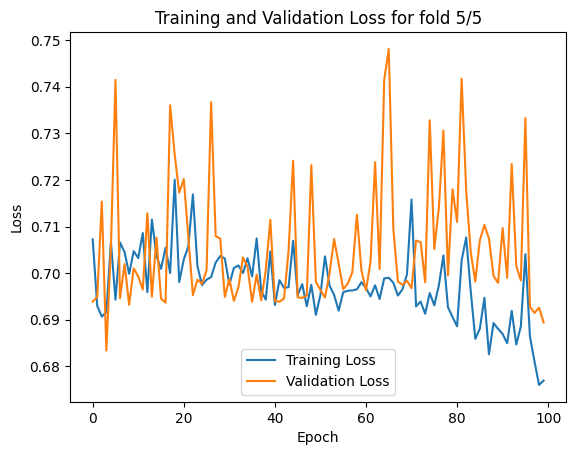

Best loss of: 0.6834056377410889 at epoch 3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.5430 - binary_crossentropy: 0.6860 - loss: 0.6860
Avg. validation loss across 5 folds: 0.6894170641899109


Avg. validation accuracy across 5 folds: 0.8080000042915344
Model saved with lowest validation loss at fold 0: saved_models/best_model_at_fold_0.h5


In [6]:
# k-fold cross-validation
k = 5
units = 100
learning_rate = .01

cv = KFold(n_splits=k, shuffle=True)

val_losses = []
val_accuracies = []

fold_idx = 0
for train_idx, val_idx in cv.split(x_all):
    fold_idx += 1
    print(f'Processing fold {fold_idx}/{k}')

    x_train_fold, x_val_fold = x_all[train_idx], x_all[val_idx]
    y_train_fold, y_val_fold = y_all[train_idx], y_all[val_idx]

    # Build and compile model
    model = Sequential()
    model.add(LSTM(units, activation='tanh', input_shape=(n_trials_per_subject, n_features)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', 
                metrics=['binary_accuracy', 'binary_crossentropy'])

    # Train model
    history = model.fit(x_train_fold, y_train_fold,
          epochs=100, batch_size=32,
          validation_data=(x_val_fold, y_val_fold), verbose=1)

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss for fold {fold_idx}/{k}')
    plt.legend()
    plt.show()

    # Find the epoch with the lowest validation loss and save the model
    best_loss = min(history.history['val_loss'])
    best_epoch = history.history['val_loss'].index(best_loss)
    print(f"Best loss of: {best_loss} at epoch {best_epoch}")
    
    val_loss, val_accuracy, _ = model.evaluate(x_val_fold, y_val_fold)

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

avg_val_loss = np.mean(val_loss)
avg_val_accuracy = np.mean(val_accuracies)

print(f"Avg. validation loss across {k} folds: {avg_val_loss}")
print(f"Avg. validation accuracy across {k} folds: {avg_val_accuracy}")

# Save the model with the lowest average validation loss across folds
best_fold_idx = np.argmin(val_losses)
folder_name = 'saved_models'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
best_model_path = os.path.join(folder_name, f'best_model_at_fold_{best_fold_idx}.h5')
print(f"Model saved with lowest validation loss at fold {best_fold_idx}: {best_model_path}")
model.save(best_model_path)

### Visualize cross-validation splits

<Axes: title={'center': 'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

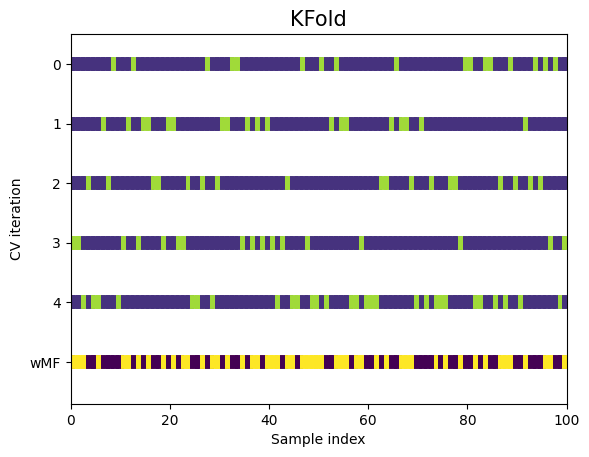

In [28]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["wMF"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 1.2, 0],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_cv_indices(kf, x_all, y_all, ax, k)

### Evaluate on the test set

In [7]:
model.evaluate(x_test, y_test)

NameError: name 'x_test' is not defined

### Load model and make predictions

In [ ]:
folder_name = 'saved_models'
new_model_path = os.path.join(folder_name, 'best_model_at_fold_4.h5')

new_model = tf.keras.models.load_model(new_model_path)

In [ ]:
# Load data
new_data_path = '/Users/noraxiao/Documents/twoStep_RNN/code/data/sampleData.csv'
new_features = ['doRareTrans', 'outcomeBin', 'resp1']

new_data = pd.read_csv(new_data_path, usecols=
                   new_features)

new_data.head()

,doRareTrans,outcomeBin,resp1
0,0,0.0,1.0
1,0,0.0,1.0
2,1,0.0,2.0
3,0,1.0,2.0
4,0,1.0,2.0


In [ ]:
# Prepare data
n_trials_per_subject = 154
n_subjects = new_data.shape[0] // n_trials_per_subject
features_to_shift = new_features

processed_data = process_data(new_data, n_subjects, n_trials_per_subject, features_to_shift)

# Deal with nans, i.e. replace with 0 for doRareTrans and outcomeBin, 1 for resp1. This is
# pretty feature dependent
cols_zeros = [0, 1] # doRareTrans, outcomeBin
cols_ones = [2] # resp1
processed_data_zeros = np.nan_to_num(processed_data, nan=0, copy=True)
processed_data_ones = np.nan_to_num(processed_data, nan=1, copy=True)

no_nan_data = np.zeros_like(processed_data)
no_nan_data[:, :, cols_zeros] = processed_data_zeros[:, :, cols_zeros]
no_nan_data[:, :, cols_ones] = processed_data_ones[:, :, cols_ones]

print('Data shape: ', processed_data.shape)

Data shape:  (10, 154, 3)


In [ ]:
# Make predictions
predictions = new_model.predict(no_nan_data)

print('Predicted wMF:\n', predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted wMF:
 [[0.99408764]
 [0.72559977]
 [0.9953896 ]
 [0.99718434]
 [0.99492687]
 [0.9978374 ]
 [0.9722814 ]
 [0.9782973 ]
 [0.8335271 ]
 [0.77803093]]
